# Phishing Website Detection


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, confusion_matrix, precision_recall_curve

In [3]:
data0 = pd.read_csv('DataFiles/5.urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [4]:
type(data0)

pandas.core.frame.DataFrame

In [5]:
data0.shape

(10000, 18)

In [6]:
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [7]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## Visualizing the data


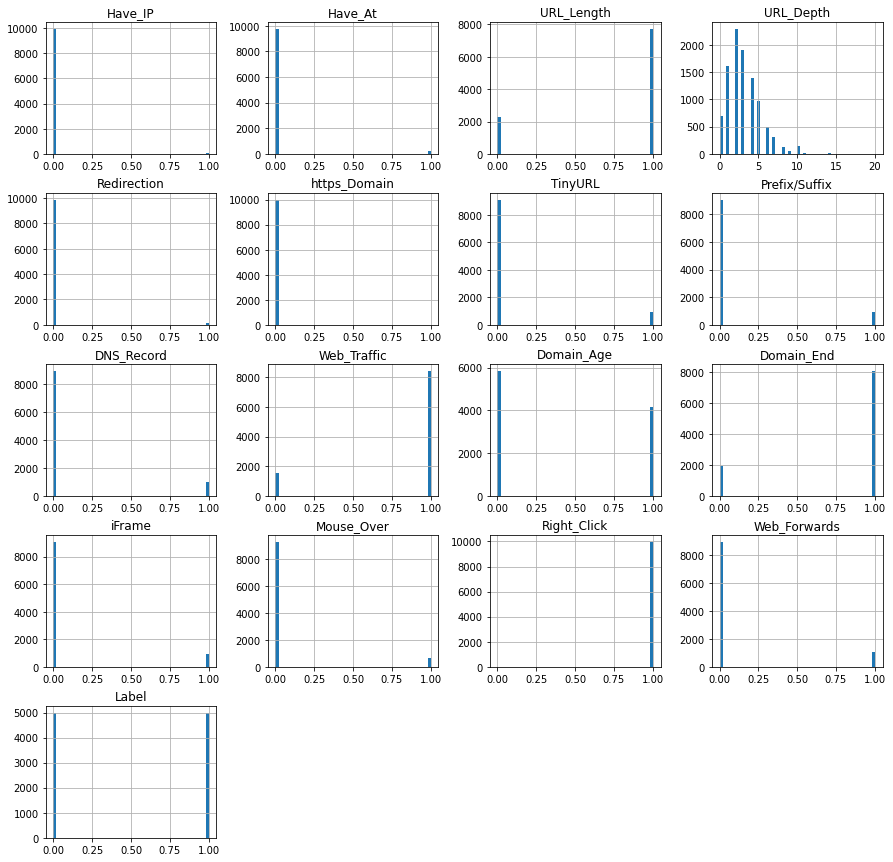

In [8]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

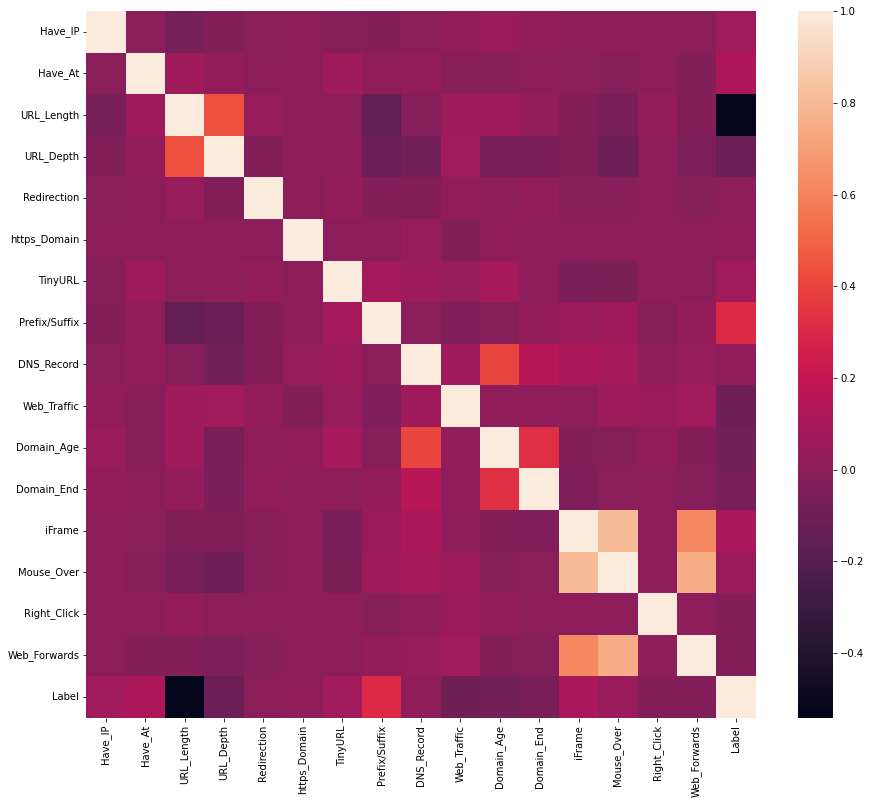

In [9]:

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

In [10]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [11]:
data = data0.drop(['Domain'], axis = 1).copy()

In [12]:
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [13]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0,1
1,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,0,1
3,0,0,1,1,0,0,0,1,1,1,1,1,0,0,1,0,1
4,0,0,1,10,0,0,0,0,0,1,0,1,0,0,1,0,0


## Splitting the Data

In [14]:
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [16]:
X_train.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards'],
      dtype='object')

## Machine Learning Models & Training

* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
ML_Model = []
acc_train = []
acc_test = []

def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [20]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)


### Performance Evaluation:**

#### confusion Matrix

In [21]:
confusion_matrix(y_test, y_test_tree)

array([[1035,   14],
       [ 335,  616]], dtype=int64)

[[TN, FN],
[FP TP]]

#### ROC curve

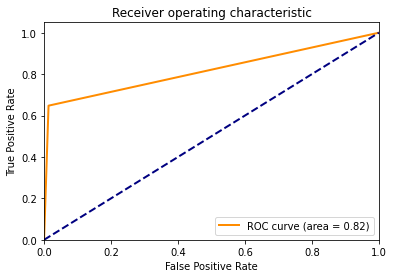

In [22]:

fpr, tpr, thresholds = roc_curve(y_test, y_test_tree)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


#### Precision-Recall curve

In [23]:
precision = precision_score(y_test, y_test_tree)
recall = recall_score(y_test, y_test_tree)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9777777777777777
Recall: 0.647739221871714


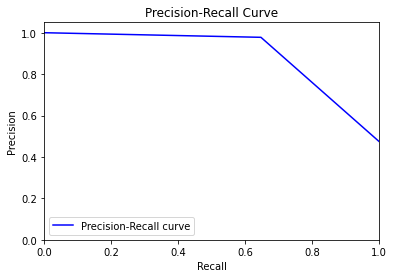

In [24]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_tree)

# Plot precision-recall curve
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [25]:
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.810
Decision Tree: Accuracy on test Data: 0.826


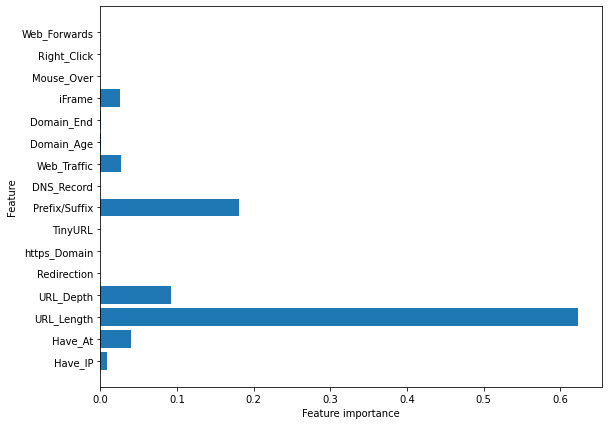

In [26]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [27]:

storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### Random Forest Classifier

In [28]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=5) 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [29]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

#### confusion Matrix

In [30]:
confusion_matrix(y_test, y_test_forest)

array([[1036,   13],
       [ 333,  618]], dtype=int64)

[[TN, FN],
[FP TP]]

#### ROC curve

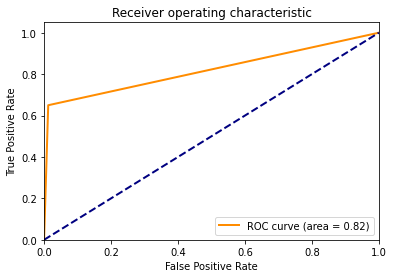

In [31]:

fpr, tpr, thresholds = roc_curve(y_test, y_test_forest)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


#### Precision-Recall curve

In [32]:
precision = precision_score(y_test, y_test_forest)
recall = recall_score(y_test, y_test_forest)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9793977812995246
Recall: 0.6498422712933754


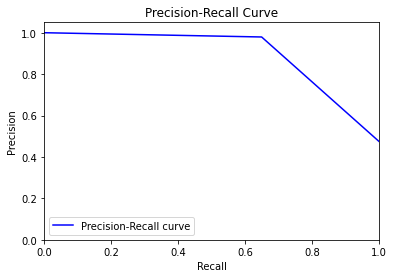

In [33]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_forest)

# Plot precision-recall curve
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [34]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.814
Random forest: Accuracy on test Data: 0.827


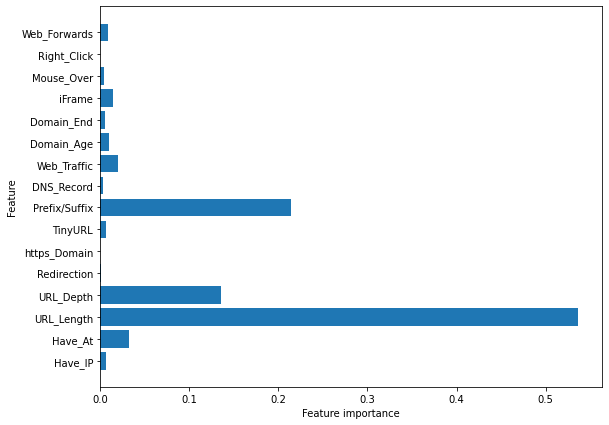

In [35]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [36]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### Multilayer Perceptrons 

In [37]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [38]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

#### confusion Matrix

In [39]:
confusion_matrix(y_test, y_test_mlp)

array([[1002,   47],
       [ 224,  727]], dtype=int64)

[[TN, FN],
[FP TP]]

#### ROC curve

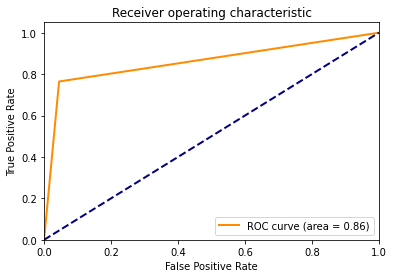

In [40]:

fpr, tpr, thresholds = roc_curve(y_test, y_test_mlp)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


#### Precision-Recall curve

In [41]:
precision = precision_score(y_test, y_test_mlp)
recall = recall_score(y_test, y_test_mlp)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9392764857881137
Recall: 0.7644584647739222


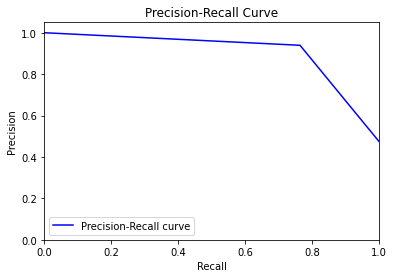

In [42]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_mlp)

# Plot precision-recall curve
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


**Performance Evaluation:**

In [43]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.864
Multilayer Perceptrons: Accuracy on test Data: 0.865


**Storing the results:**

In [44]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### XGBoost Classifier

In [45]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [46]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

#### confusion Matrix

In [47]:
confusion_matrix(y_test, y_test_xgb)

array([[994,  55],
       [209, 742]], dtype=int64)

[[TN, FN],
[FP TP]]

#### ROC curve

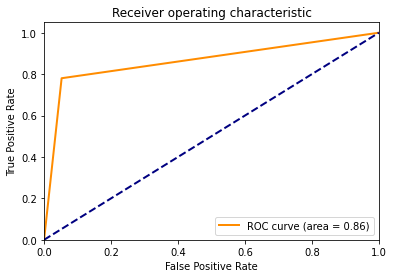

In [48]:

fpr, tpr, thresholds = roc_curve(y_test, y_test_xgb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


#### Precision-Recall curve

In [49]:
precision = precision_score(y_test, y_test_xgb)
recall = recall_score(y_test, y_test_xgb)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.93099121706399
Recall: 0.7802313354363828


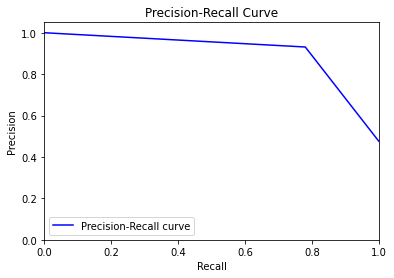

In [50]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_xgb)

# Plot precision-recall curve
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [51]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.866
XGBoost : Accuracy on test Data: 0.868


**Storing the results:**

In [52]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### Autoencoder Neural Network (Deep Learning)

In [53]:
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [54]:
#building autoencoder model

input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim, ))
encoder = Dense(64, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(64, activation="relu")(encoder)

encoder = Dense(64, activation="relu")(encoder)
code = Dense(64, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(code)

decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(1, activation='sigmoid')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,633
Trainable params: 13,633
Non-trainable p

In [55]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, y_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 0.5345 - accuracy: 0.7683 - val_loss: 0.4272 - val_accuracy: 0.8094
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8064 - val_loss: 0.4091 - val_accuracy: 0.8188
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8172 - val_loss: 0.3883 - val_accuracy: 0.8250
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8213 - val_loss: 0.3800 - val_accuracy: 0.8294
Epoch 5/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8322 - val_loss: 0.3751 - val_accuracy: 0.8369
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8386 - val_loss: 0.3815 - val_accuracy: 0.8225
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8384 - val_loss: 0.3693 - val_accuracy: 0.8400
Epoch 

#### Accuracy Curve

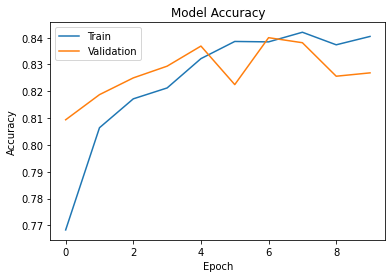

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [57]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 1ms/step - loss: 2.4339 - accuracy: 0.4929

Autoencoder: Accuracy on training Data: 0.482
Autoencoder: Accuracy on test Data: 0.493


**Storing the results:**

In [58]:
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

### Support Vector Machines

In [59]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=12)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [60]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

#### confusion Matrix

In [61]:
confusion_matrix(y_test, y_test_svm)

array([[1028,   21],
       [ 362,  589]], dtype=int64)

[[TN, FN],
[FP TP]]

#### ROC curve

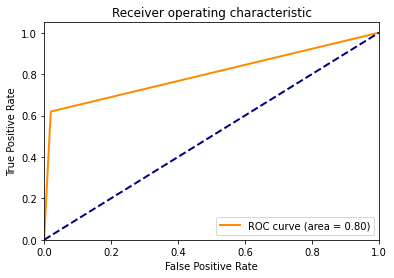

In [62]:

fpr, tpr, thresholds = roc_curve(y_test, y_test_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


#### Precision-Recall curve

In [63]:
precision = precision_score(y_test, y_test_svm)
recall = recall_score(y_test, y_test_svm)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9655737704918033
Recall: 0.619348054679285


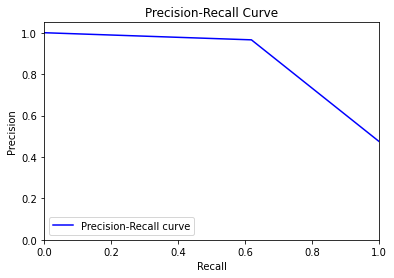

In [64]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_svm)

# Plot precision-recall curve
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [65]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.800
SVM : Accuracy on test Data: 0.808


**Storing the results:**

In [66]:
storeResults('SVM', acc_train_svm, acc_test_svm)

## Comparision of Models

In [67]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.810,0.826
1,Random Forest,0.814,0.827
2,Multilayer Perceptrons,0.864,0.864
3,XGBoost,0.866,0.868
4,AutoEncoder,0.482,0.493
5,SVM,0.800,0.808


In [68]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.866,0.868
2,Multilayer Perceptrons,0.864,0.864
1,Random Forest,0.814,0.827
0,Decision Tree,0.810,0.826
5,SVM,0.800,0.808
4,AutoEncoder,0.482,0.493


In [69]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

## PSO Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import random

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [72]:
# Define the fitness function to evaluate a particle's performance
def fitness_function(particle, X_train, y_train, X_val, y_val):
    features = np.where(particle == 1)[0]
    if len(features) == 0:
        return 0
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train[:, features], y_train)
    y_pred = clf.predict(X_val[:, features])
    return accuracy_score(y_val, y_pred)

In [73]:
# Define the PSO algorithm
def pso(X_train, y_train, X_val, y_val, num_particles=30, max_iterations=10, c1=2, c2=2, w=0.7):
    num_features = X_train.shape[1]
    # Initialize particles and velocities randomly
    particles = np.random.randint(2, size=(num_particles, num_features))
    velocities = np.zeros_like(particles)
    # Initialize the best particle and its fitness value
    best_particle = particles[0]
    best_fitness = fitness_function(best_particle, X_train, y_train, X_val, y_val)
    # Initialize the personal bests and their fitness values
    personal_bests = particles.copy()
    personal_best_fitnesses = np.zeros(num_particles)
    for i in range(num_particles):
        personal_best_fitnesses[i] = fitness_function(personal_bests[i], X_train, y_train, X_val, y_val)
        if personal_best_fitnesses[i] > best_fitness:
            best_particle = personal_bests[i]
            best_fitness = personal_best_fitnesses[i]
    # Run the PSO algorithm for the specified number of iterations
    for iteration in range(max_iterations):
        # Update velocities and particles
        r1 = np.random.rand(num_particles, num_features)
        r2 = np.random.rand(num_particles, num_features)
        velocities = w * velocities + c1 * r1 * (personal_bests - particles) + c2 * r2 * (best_particle - particles)
        particles = np.round(1 / (1 + np.exp(-velocities)))
        # Evaluate fitness and update personal bests and global best
        for i in range(num_particles):
            fitness = fitness_function(particles[i], X_train, y_train, X_val, y_val)
            if fitness > personal_best_fitnesses[i]:
                personal_bests[i] = particles[i]
                personal_best_fitnesses[i] = fitness
                if fitness > best_fitness:
                    best_particle = particles[i]
                    best_fitness = fitness
        print("Iteration:", iteration, "Best Fitness:", best_fitness)
    return best_particle, best_fitness


In [74]:
X_train_np = X_train.values.astype(int)
y_train_np = y_train.values.astype(int)
X_val_np = X_val.values.astype(int)
y_val_np = y_val.values.astype(int)
X_test_np = X_test.values.astype(int)
y_test_np = y_test.values.astype(int)

In [75]:
best_particle, best_fitness = pso(X_train_np, y_train_np, X_val_np, y_val_np)


Iteration: 0 Best Fitness: 0.851875
Iteration: 1 Best Fitness: 0.854375
Iteration: 2 Best Fitness: 0.86375
Iteration: 3 Best Fitness: 0.86375
Iteration: 4 Best Fitness: 0.86375
Iteration: 5 Best Fitness: 0.86375
Iteration: 6 Best Fitness: 0.86375
Iteration: 7 Best Fitness: 0.86375
Iteration: 8 Best Fitness: 0.86375
Iteration: 9 Best Fitness: 0.86375


Iteration: 0 Best Fitness: 0.823125
Iteration: 0 Best Fitness: 0.844375
Iteration: 0 Best Fitness: 0.8375
Iteration: 0 Best Fitness: 0.845
Iteration: 0 Best Fitness: 0.843125
Iteration: 0 Best Fitness: 0.825625
Iteration: 0 Best Fitness: 0.844375
Iteration: 0 Best Fitness: 0.8375
Iteration: 0 Best Fitness: 0.86375


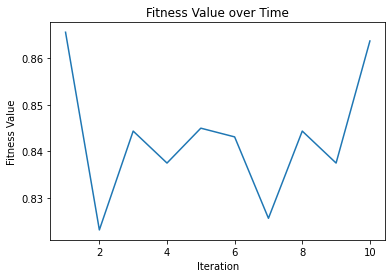

In [80]:
# fitness value changes over time using a line plot.
fitness_values = []
fitness_values.append(best_fitness)
for iteration in range(1, 10):
    _, best_fitness = pso(X_train_np, y_train_np, X_val_np, y_val_np, max_iterations=1)
    fitness_values.append(best_fitness)
    
plt.plot(range(1, 11), fitness_values)
plt.title('Fitness Value over Time')
plt.xlabel('Iteration')
plt.ylabel('Fitness Value')
plt.show()

Iteration: 0 Best Fitness: 0.8225
Iteration: 1 Best Fitness: 0.833125
Iteration: 2 Best Fitness: 0.835
Iteration: 3 Best Fitness: 0.835
Iteration: 4 Best Fitness: 0.835
Iteration: 5 Best Fitness: 0.835
Iteration: 6 Best Fitness: 0.835
Iteration: 7 Best Fitness: 0.835
Iteration: 8 Best Fitness: 0.835
Iteration: 9 Best Fitness: 0.835
Iteration: 0 Best Fitness: 0.86375
Iteration: 1 Best Fitness: 0.86375
Iteration: 2 Best Fitness: 0.86625
Iteration: 3 Best Fitness: 0.86625
Iteration: 4 Best Fitness: 0.86625
Iteration: 5 Best Fitness: 0.86625
Iteration: 6 Best Fitness: 0.86625
Iteration: 7 Best Fitness: 0.86625
Iteration: 8 Best Fitness: 0.86625
Iteration: 9 Best Fitness: 0.86625
Iteration: 0 Best Fitness: 0.853125
Iteration: 1 Best Fitness: 0.853125
Iteration: 2 Best Fitness: 0.8625
Iteration: 3 Best Fitness: 0.8625
Iteration: 4 Best Fitness: 0.87
Iteration: 5 Best Fitness: 0.870625
Iteration: 6 Best Fitness: 0.870625
Iteration: 7 Best Fitness: 0.870625
Iteration: 8 Best Fitness: 0.870625


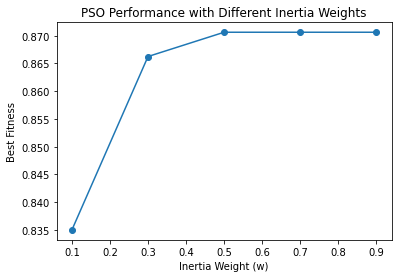

In [76]:

# Define the range of values for the inertia weight parameter
w_range = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialize an empty list to store the best fitness values for each value of w
best_fitnesses = []

# Run the PSO algorithm for each value of w and store the best fitness value
for w in w_range:
    best_particle, best_fitness = pso(X_train_np, y_train_np, X_val_np, y_val_np, w=w)
    best_fitnesses.append(best_fitness)

# Plot the results
plt.plot(w_range, best_fitnesses, marker='o')
plt.xlabel('Inertia Weight (w)')
plt.ylabel('Best Fitness')
plt.title('PSO Performance with Different Inertia Weights')
plt.show()


Iteration: 0 Best Fitness: 0.841875
Iteration: 1 Best Fitness: 0.843125
Iteration: 2 Best Fitness: 0.845625
Iteration: 3 Best Fitness: 0.845625
Iteration: 4 Best Fitness: 0.845625
Iteration: 5 Best Fitness: 0.845625
Iteration: 6 Best Fitness: 0.845625
Iteration: 7 Best Fitness: 0.845625
Iteration: 8 Best Fitness: 0.845625
Iteration: 9 Best Fitness: 0.845625
Iteration: 0 Best Fitness: 0.85875
Iteration: 1 Best Fitness: 0.85875
Iteration: 2 Best Fitness: 0.864375
Iteration: 3 Best Fitness: 0.866875
Iteration: 4 Best Fitness: 0.866875
Iteration: 5 Best Fitness: 0.866875
Iteration: 6 Best Fitness: 0.866875
Iteration: 7 Best Fitness: 0.866875
Iteration: 8 Best Fitness: 0.866875
Iteration: 9 Best Fitness: 0.866875
Iteration: 0 Best Fitness: 0.8525
Iteration: 1 Best Fitness: 0.85875
Iteration: 2 Best Fitness: 0.868125
Iteration: 3 Best Fitness: 0.868125
Iteration: 4 Best Fitness: 0.868125
Iteration: 5 Best Fitness: 0.868125
Iteration: 6 Best Fitness: 0.868125
Iteration: 7 Best Fitness: 0.8681

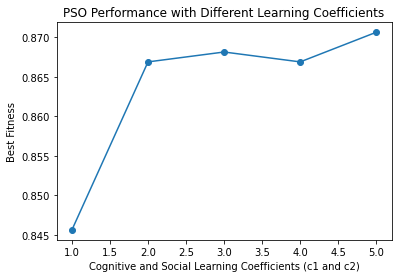

In [77]:

# Define the range of values for the cognitive and social learning coefficients
c_range = [1, 2, 3, 4, 5]

# Initialize an empty list to store the best fitness values for each value of c1 and c2
best_fitnesses = []

# Run the PSO algorithm for each value of c1 and c2 and store the best fitness value
for c in c_range:
    best_particle, best_fitness = pso(X_train_np, y_train_np, X_val_np, y_val_np, c1=c, c2=c)
    best_fitnesses.append(best_fitness)

# Plot the results
plt.plot(c_range, best_fitnesses, marker='o')
plt.xlabel('Cognitive and Social Learning Coefficients (c1 and c2)')
plt.ylabel('Best Fitness')
plt.title('PSO Performance with Different Learning Coefficients')
plt.show()


In [79]:
# From the above graph it is found that the best value for w, c1 and c2 is 0.5, 5, 5

best_particle, best_fitness = pso(X_train_np, y_train_np, X_val_np, y_val_np, w=0.5, c1=5, c2=5)


Iteration: 0 Best Fitness: 0.83625
Iteration: 1 Best Fitness: 0.85375
Iteration: 2 Best Fitness: 0.865
Iteration: 3 Best Fitness: 0.865625
Iteration: 4 Best Fitness: 0.865625
Iteration: 5 Best Fitness: 0.865625
Iteration: 6 Best Fitness: 0.865625
Iteration: 7 Best Fitness: 0.865625
Iteration: 8 Best Fitness: 0.865625
Iteration: 9 Best Fitness: 0.865625


In [23]:
# Train a Random Forest classifier on the selected features and evaluate it on the test set
features = np.where(best_particle == 1)[0]
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_np[:,features], y_train_np)

RandomForestClassifier(random_state=42)

In [24]:
y_test_clf_pso = clf.predict(X_test_np[:,features])
y_train_clf_pso= clf.predict(X_train_np[:, features])

In [25]:
acc_train_clf = accuracy_score(y_train_np,y_train_clf_pso)
acc_test_clf = accuracy_score(y_test_np,y_test_clf_pso)

print("Optimize Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_clf))
print("Optimize Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_clf))

Optimize Random Forest: Accuracy on training Data: 0.860
Optimize Random Forest: Accuracy on test Data: 0.874


In [26]:
# save pso model to file
import pickle
pickle.dump(clf, open("PSO.pickle.dat", "wb"))